In [ ]:
import pandas as pd

df=pd.read_csv('data/fraud.csv', index_col = 0)
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values
print(X.shape, y.shape)
# print(df.columns)
# print(df.isnull().sum())
print(df[['Class']].value_counts())
df['Class'].value_counts(normalize=True) * 100



(21693, 29) (21693,)
Class
0        21337
1          356
Name: count, dtype: int64


Class
0    98.358918
1     1.641082
Name: proportion, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#--------------------------------------------------
## ------------ SVM Classifier ------------------## 
#--------------------------------------------------

from sklearn.svm import SVC

## Linear Kernel  ---------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'linear',
                     class_weight='balanced'))]

svcL_pipeline = Pipeline(steps)
svcL_pipeline.fit(X_train, y_train)

## Polynomial Kernel -----------------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'poly', degree = 3, 
                     class_weight='balanced'))]

svcPoly_pipeline = Pipeline(steps)
svcPoly_pipeline.fit(X_train, y_train)

## RBF Kernel -----------------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'rbf', gamma = 'scale',
                     class_weight='balanced'))]

svcRBF_pipeline = Pipeline(steps)
svcRBF_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced'))])

In [32]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


linear_ypred_test = svcL_pipeline.predict(X_test)
linear_mat_clf = confusion_matrix(y_test, linear_ypred_test)
linear_report_clf = classification_report(y_test, linear_ypred_test)
#Actual 0 [TN FP] 1 [FN TP]
print("Linear SVM classification report")
print("Consufion Matrix: ",linear_mat_clf.tolist())
print("Classification Report ")
print(linear_report_clf)

linear_yscore = svcL_pipeline.decision_function(X_test)
# print(linear_yscore)
# print(linear_yscore.shape)
linear_auc = roc_auc_score(y_test, linear_yscore)
print("Roc AUC Score: ",linear_auc)

Linear SVM classification report
Consufion Matrix:  [[8299, 242], [16, 121]]
Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8541
           1       0.33      0.88      0.48       137

    accuracy                           0.97      8678
   macro avg       0.67      0.93      0.73      8678
weighted avg       0.99      0.97      0.98      8678

Roc AUC Score:  0.9515356156692024


In [29]:
poly_ypred_test = svcPoly_pipeline.predict(X_test)
poly_mat_clf = confusion_matrix(y_test, poly_ypred_test)
poly_report_clf = classification_report(y_test, poly_ypred_test)
print("Poly SVM classification report")
print("Consufion Matrix: ",poly_mat_clf.tolist())
print("Classification Report ")
print(poly_report_clf)

poly_yscore = svcPoly_pipeline.decision_function(X_test)
# print(poly_yscore)
# print(poly_yscore.shape)
poly_auc = roc_auc_score(y_test, poly_yscore)
print("Roc AUC Score: ",poly_auc)

Poly SVM classification report
Consufion Matrix:  [[8485, 56], [28, 109]]
Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8541
           1       0.66      0.80      0.72       137

    accuracy                           0.99      8678
   macro avg       0.83      0.89      0.86      8678
weighted avg       0.99      0.99      0.99      8678

Roc AUC Score:  0.9211933507503949


In [31]:
rbf_Sypred_test = svcRBF_pipeline.predict(X_test)
rbf_mat_clf = confusion_matrix(y_test, rbf_Sypred_test)
rbf_report_clf = classification_report(y_test, rbf_Sypred_test)
print("RBF SVM classification report")
print("Consufion Matrix: ",rbf_mat_clf.tolist())
print("Classification Report ")
print(rbf_report_clf)

rbf_yscore = svcRBF_pipeline.decision_function(X_test)
# print(rbf_yscore)
# print(rbf_yscore.shape)
rbf_auc = roc_auc_score(y_test, rbf_yscore)
print("Roc AUC Score: ",rbf_auc)

RBF SVM classification report
Consufion Matrix:  [[8450, 91], [31, 106]]
Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8541
           1       0.54      0.77      0.63       137

    accuracy                           0.99      8678
   macro avg       0.77      0.88      0.81      8678
weighted avg       0.99      0.99      0.99      8678

Roc AUC Score:  0.972283113568985


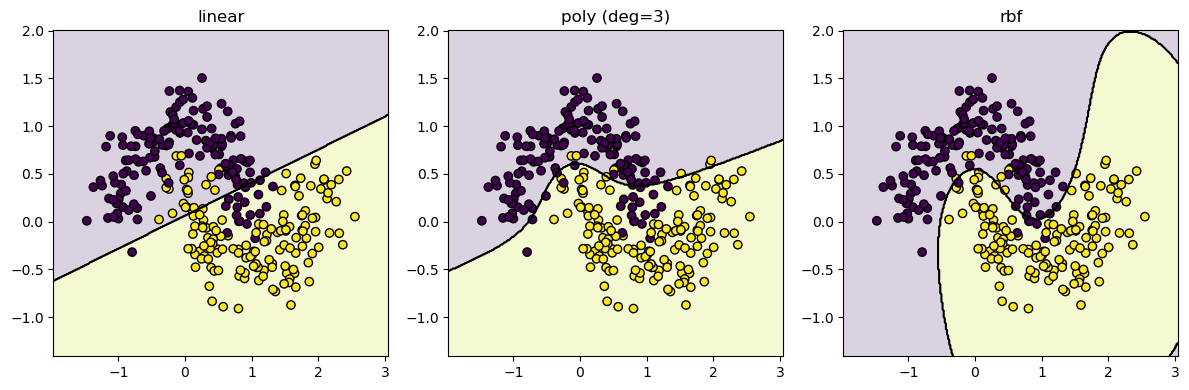

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# 1) Create toy 2D dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# 2) Train SVM with different kernels
models = {
    "linear": SVC(kernel="linear"),
    "poly (deg=3)": SVC(kernel="poly", degree=3),
    "rbf": SVC(kernel="rbf"),
}
for name, model in models.items():
    model.fit(X, y)

# 3) Create meshgrid
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# 4) Plot decision boundary for each
plt.figure(figsize=(12,4))
for i,(name, model) in enumerate(models.items(),1):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1,3,i)
    plt.contourf(xx, yy, Z, alpha=0.2)         # colored region
    plt.contour(xx, yy, Z, levels=[0.5], colors="black") # boundary line
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k")
    plt.title(name)

plt.tight_layout()
plt.show()